# **Summary**

In this research project, the primary goal was to construct a predictive algorithm aimed at determining the likelihood of an individual experiencing a stroke. The central inquiry revolved around identifying the most effective model for this prediction task. The selection process involved a strategic approach employing two distinct models: decision trees and linear regression. Initially, categorical variables were carefully chosen and subjected to one-hot encoding. A classification tree was then employed to delineate the points of divergence or splits in the data. Notably, the tree, characterized by a depth of 3, notably highlighted crucial variables such as ever_married, work_status, Residence_type, and smoking_status as pivotal factors in predicting stroke likelihood.

Following this, a linear regression analysis was conducted. The model was built using the categorical variables transformed into dummy variables and the numerical variables represented as polynomials up to a degree of 2. Despite the careful methodology and consideration of various variables, the resultant model only yielded an $R^2$ value of 0.083 and an associated $RMSE$ of 0.206.

These findings fell significantly short of expectations, especially considering the anticipation of a more promising outcome given the chosen strategy. The actual versus predicted plot unveiled substantial deviations between the predicted probabilities of stroke occurrence and the real observed incidences. Additionally, the examination of residual distributions further underscored the model's limitations. The residuals, indicative of the differences between predicted and observed values, exhibited a distribution pattern that deviated significantly from the expected normality. Ultimately, the model's predictive performance, as gauged by the $RMSE$, did not surpass that of a simple linear model, marking a disappointing outcome.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_train = pd.read_csv(r'C:\Users\qaism\OneDrive - University of Virginia\Documents\Class Documents\DS 3001\group14\project_2\data\training_data.csv')
df_test = pd.read_csv(r'C:\Users\qaism\OneDrive - University of Virginia\Documents\Class Documents\DS 3001\group14\project_2\data\testing_data.csv')


# Approach/Strategy

I am going to begin with the categorical variables and run a decision tree on them to see what variables the tree is splitting on. I will then run a linear regression with the numerical variables, including the categorical variables that the tree indicated were predictive.

1. One-hot encode the categorical variables

In [4]:
y_train = df_train['stroke']
X_train = df_train.drop('stroke',axis=1)
y_test = df_test['stroke']
X_test = df_test.drop('stroke',axis=1)

X_train['bmi'] = X_train['bmi'].fillna(X_train['bmi'].mean())
X_test['bmi'] = X_test['bmi'].fillna(X_test['bmi'].mean())

In [5]:
#Get the categorical variables
X_train_categ = X_train.loc[:,['ever_married','gender','Residence_type','smoking_status','work_type'] ]
X_test_categ = X_test.loc[:,['ever_married','gender','Residence_type','smoking_status','work_type'] ]

In [6]:
#One-hot encoding for categorical variables
from sklearn.preprocessing import LabelBinarizer
one_hot_encoder = LabelBinarizer()

In [7]:
Married_train = pd.get_dummies(X_train_categ['ever_married'], dtype='int')
MarriedDF_train = Married_train.rename(columns={'No': 'ever_married_Yes', 'Yes': 'ever_married_No'})
MarriedDF_train.head()

,ever_married_Yes,ever_married_No
0,0,1
1,0,1
2,1,0
3,0,1
4,1,0


In [8]:
Married_test = pd.get_dummies(X_test_categ['ever_married'], dtype='int')
MarriedDF_test = Married_test.rename(columns={'No': 'ever_married_Yes', 'Yes': 'ever_married_No'})
MarriedDF_test.head()

,ever_married_Yes,ever_married_No
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1


In [9]:
GenderDF_train = pd.get_dummies(X_train_categ['gender'], dtype='int')
GenderDF_train.head()

,Female,Male,Other
0,0,1,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [11]:
GenderDF_test = pd.get_dummies(X_test_categ['gender'], dtype='int')

# Check if 'Other' column exists before dropping it
if 'Other' in GenderDF_test.columns:
    GenderDF_test.drop(columns='Other', inplace=True)

GenderDF_test.head()

,Female,Male
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [14]:
ResidenceDF_train = pd.get_dummies(X_train_categ['Residence_type'], dtype='int')
ResidenceDF_train.head()

,Rural,Urban
0,0,1
1,1,0
2,1,0
3,0,1
4,0,1


In [15]:
ResidenceDF_test = pd.get_dummies(X_test_categ['Residence_type'], dtype='int')
ResidenceDF_test.head()

,Rural,Urban
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1


In [16]:
Smoking_train = pd.get_dummies(X_train_categ['smoking_status'],dtype='int')
oh = one_hot_encoder.fit_transform(X_train_categ['smoking_status']) # One-hot encode the 'bird' variable
names = one_hot_encoder.classes_ # Get names of the classes
SmokingDF_train = pd.DataFrame( data = oh, columns = names) # Create a new df for the encoded variables
SmokingDF_train.drop(columns='Unknown', inplace=True)
SmokingDF_train.head()

,formerly smoked,never smoked,smokes
0,1,0,0
1,0,1,0
2,0,0,0
3,0,1,0
4,0,0,0


In [17]:
Smoking_test = pd.get_dummies(X_test_categ['smoking_status'],dtype='int')
oh = one_hot_encoder.fit_transform(X_test_categ['smoking_status']) # One-hot encode the 'bird' variable
names = one_hot_encoder.classes_ # Get names of the classes
SmokingDF_test = pd.DataFrame( data = oh, columns = names) # Create a new df for the encoded variables
SmokingDF_test.drop(columns='Unknown', inplace=True)
SmokingDF_test.head()

,formerly smoked,never smoked,smokes
0,0,1,0
1,0,0,0
2,1,0,0
3,0,0,0
4,0,1,0


In [18]:
Work_train = pd.get_dummies(X_train_categ['work_type'],dtype='int')
oh = one_hot_encoder.fit_transform(X_train_categ['work_type']) # One-hot encode the 'bird' variable
names = one_hot_encoder.classes_ # Get names of the classes
WorkDF_train = pd.DataFrame( data = oh, columns = names) # Create a new df for the encoded variables
WorkDF_train.head()

,Govt_job,Never_worked,Private,Self-employed,children
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,1,0,0


In [19]:
Work_test = pd.get_dummies(X_test_categ['work_type'],dtype='int')
oh = one_hot_encoder.fit_transform(X_test_categ['work_type']) # One-hot encode the 'bird' variable
names = one_hot_encoder.classes_ # Get names of the classes
WorkDF_test = pd.DataFrame( data = oh, columns = names) # Create a new df for the encoded variables
WorkDF_test.head()

,Govt_job,Never_worked,Private,Self-employed,children
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,1,0


In [20]:
X_train_categ_oh = pd.concat([MarriedDF_train,GenderDF_train,ResidenceDF_train, SmokingDF_train, WorkDF_train],axis=1)
X_train_categ_oh.head()

,ever_married_Yes,ever_married_No,Female,Male,Other,Rural,Urban,formerly smoked,never smoked,smokes,Govt_job,Never_worked,Private,Self-employed,children
0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0
1,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0
2,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0
3,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0
4,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0


In [21]:
X_test_categ_oh = pd.concat([MarriedDF_test,GenderDF_test,ResidenceDF_test, SmokingDF_test, WorkDF_test],axis=1)
X_test_categ_oh.head()

,ever_married_Yes,ever_married_No,Female,Male,Rural,Urban,formerly smoked,never smoked,smokes,Govt_job,Never_worked,Private,Self-employed,children
0,0,1,0,1,0,1,0,1,0,0,0,1,0,0
1,1,0,1,0,0,1,0,0,0,0,0,1,0,0
2,0,1,1,0,1,0,1,0,0,0,0,1,0,0
3,0,1,1,0,0,1,0,0,0,0,0,1,0,0
4,0,1,1,0,0,1,0,1,0,0,0,0,1,0


2. Fit the decision tree with a max depth of 2

In [22]:
X_train_categ_oh.columns

Index(['ever_married_Yes', 'ever_married_No', 'Female', 'Male', 'Other',
       'Rural', 'Urban', 'formerly smoked', 'never smoked', 'smokes',
       'Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children'],
      dtype='object')

[Text(0.5, 0.875, 'x[0] <= 0.5\ngini = 0.093\nsamples = 4087\nvalue = [3888, 199]'),
 Text(0.25, 0.625, 'x[7] <= 0.5\ngini = 0.12\nsamples = 2686\nvalue = [2514, 172]'),
 Text(0.125, 0.375, 'x[13] <= 0.5\ngini = 0.107\nsamples = 2110\nvalue = [1990, 120]'),
 Text(0.0625, 0.125, 'gini = 0.102\nsamples = 1678\nvalue = [1588, 90]'),
 Text(0.1875, 0.125, 'gini = 0.129\nsamples = 432\nvalue = [402, 30]'),
 Text(0.375, 0.375, 'x[10] <= 0.5\ngini = 0.164\nsamples = 576\nvalue = [524, 52]'),
 Text(0.3125, 0.125, 'gini = 0.179\nsamples = 484\nvalue = [436, 48]'),
 Text(0.4375, 0.125, 'gini = 0.083\nsamples = 92\nvalue = [88, 4]'),
 Text(0.75, 0.625, 'x[14] <= 0.5\ngini = 0.038\nsamples = 1401\nvalue = [1374, 27]'),
 Text(0.625, 0.375, 'x[12] <= 0.5\ngini = 0.057\nsamples = 859\nvalue = [834, 25]'),
 Text(0.5625, 0.125, 'gini = 0.113\nsamples = 200\nvalue = [188, 12]'),
 Text(0.6875, 0.125, 'gini = 0.039\nsamples = 659\nvalue = [646, 13]'),
 Text(0.875, 0.375, 'x[3] <= 0.5\ngini = 0.007\nsamples

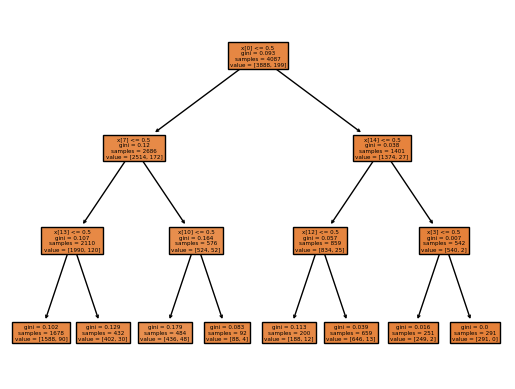

In [23]:
from sklearn import tree # Import the tree classifier

# Fit decision tree:
cart = tree.DecisionTreeClassifier(max_depth=3) # Create a classifier object
cart = cart.fit(X_train_categ_oh, y_train) # Fit the classifier

# Visualize results:
tree.plot_tree(cart,filled=True)

The decision tree is splitting on marriage, work, and residence type and smoking status. So I will include those in the linear regression below.

In [25]:
# One-hot encoding with 'Other' category included
GenderDF_train = pd.get_dummies(X_train_categ['gender'], dtype='int', columns=['Female', 'Male', 'Other'])
GenderDF_test = pd.get_dummies(X_test_categ['gender'], dtype='int', columns=['Female', 'Male', 'Other'])

# Align the columns in training and testing datasets
common_cols = GenderDF_train.columns.intersection(GenderDF_test.columns)
GenderDF_train = GenderDF_train[common_cols].copy()
GenderDF_test = GenderDF_test[common_cols].copy()

# Add missing columns with zeros if any
missing_cols_train = set(GenderDF_test.columns) - set(GenderDF_train.columns)
missing_cols_test = set(GenderDF_train.columns) - set(GenderDF_test.columns)

for col in missing_cols_train:
    GenderDF_train[col] = 0

for col in missing_cols_test:
    GenderDF_test[col] = 0

# Ensure the order of columns is the same
GenderDF_train = GenderDF_train[sorted(GenderDF_train.columns)]
GenderDF_test = GenderDF_test[sorted(GenderDF_test.columns)]

In [27]:

# Get the list of columns in the training data
train_cols = X_train_categ_oh.columns

# Reindex the testing data with the same columns, filling missing values with 0
X_test_categ_oh = X_test_categ_oh.reindex(columns=train_cols, fill_value=0)

# Now your features in training and testing data should match
# You can now safely use the 'score' method
print('R2: ', cart.score(X_test_categ_oh, y_test))

R2:  0.9511241446725318


In [28]:
#Checking current metrics
print('R2: ', cart.score(X_test_categ_oh, y_test)) # R squared measure
tree_predictions = cart.predict(X_test_categ_oh)
N = len(y_test)
print('RMSE: ', (np.sum( (y_test - tree_predictions)**2)/N )**.5 )   # R squared measure

R2:  0.9511241446725318
RMSE:  0.22107884414269094


3. Run the linear regression with numeric variables and include the categorical variables that the tree splits on

Handling outliers in the numeric variables:

In [29]:
X_train_numeric = X_train.loc[:,['age','hypertension','heart_disease','bmi','avg_glucose_level'] ]
X_test_numeric = X_test.loc[:,['age','hypertension','heart_disease','bmi','avg_glucose_level'] ]

<Axes: >

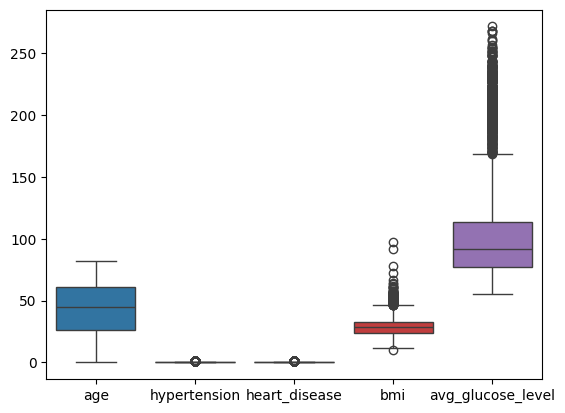

In [30]:
sns.boxplot(X_train_numeric)

<Axes: >

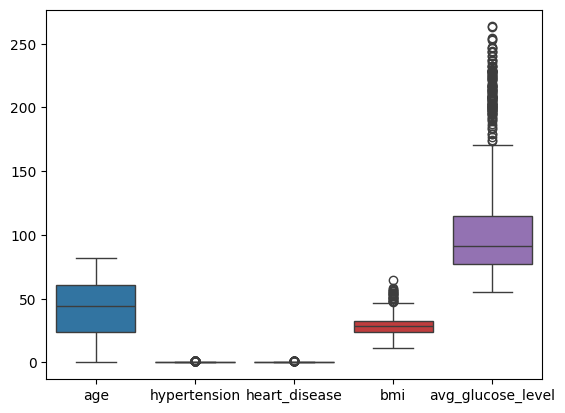

In [31]:
sns.boxplot(X_test_numeric)

In [32]:
## Function to compute whiskers:
def windsorize(x):
    # Compute IQR and 1st,3rd quantiles
    pct25, pct75 = np.percentile(x,[25,75])
    iqr = pct75 - pct25
    # Compute whiskers:
    lower_whisker = pct25 - iqr*1.5
    upper_whisker = pct75 + iqr*1.5
    # Windsorize x:
    x_windsor = x
    x_windsor[ x < lower_whisker ] = lower_whisker
    x_windsor[ x > upper_whisker ] = upper_whisker
    return(x_windsor)

In [33]:
X_train_numeric.apply(windsorize)
X_test_numeric.apply(windsorize)

,age,hypertension,heart_disease,bmi,avg_glucose_level
0,58.0,0,0,39.200000,87.960
1,8.0,0,0,17.600000,110.890
2,70.0,0,0,35.900000,69.040
3,47.0,0,0,46.575000,172.225
4,74.0,0,0,46.575000,172.225
...,...,...,...,...,...
1018,74.0,0,0,28.772579,60.980
1019,73.0,0,0,34.400000,70.940
1020,57.0,0,0,31.700000,86.300
1021,75.0,0,0,29.300000,78.800


<Axes: >

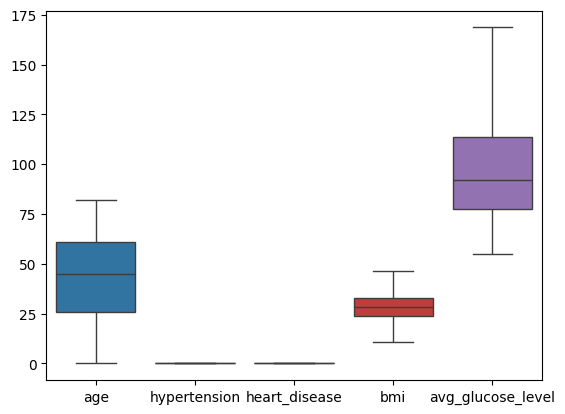

In [34]:
sns.boxplot(X_train_numeric)

<Axes: >

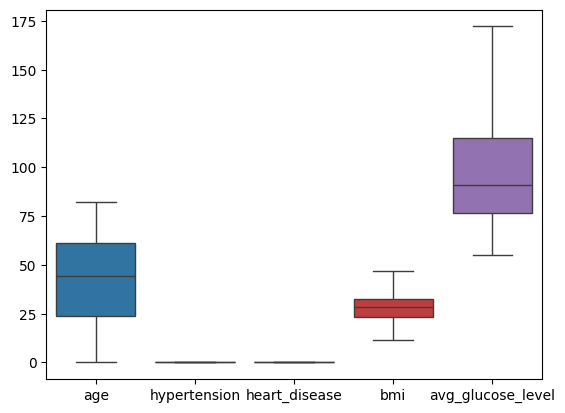

In [35]:
sns.boxplot(X_test_numeric)

In [36]:
## Linear Model
from sklearn.linear_model import LinearRegression # Import linear regression model
from sklearn.preprocessing import PolynomialFeatures


expander = PolynomialFeatures(degree=2,include_bias=False) # Create the expander
Z = expander.fit_transform(X_train_numeric) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
continuous = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe

dummies = pd.concat([ pd.get_dummies(X_train['work_type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_train['Residence_type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_train['smoking_status'],dtype='int',drop_first=True),
                      MarriedDF_train],axis=1)

Z_train = pd.concat([continuous,dummies],axis=1)


expander = PolynomialFeatures(degree=2,include_bias=False) # Create the expander
Z = expander.fit_transform(X_test_numeric) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
continuous = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe

dummies = pd.concat([ pd.get_dummies(X_test['work_type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_test['Residence_type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_test['smoking_status'],dtype='int',drop_first=True),
                      MarriedDF_test],axis=1)

Z_test = pd.concat([continuous,dummies],axis=1)

# Fit the model and get the R2 measure:
reg = LinearRegression().fit(Z_train, y_train) # Fit the linear model
print('R2: ', reg.score(Z_test, y_test)) # R squared measure
y_hat = reg.predict(Z_test)
N = len(y_test)
print('RMSE: ', (np.sum( (y_test - y_hat)**2)/N )**.5 )   # R squared measure

R2:  0.08802240592465616
RMSE:  0.20590072358516537


4. Plot and visualize results

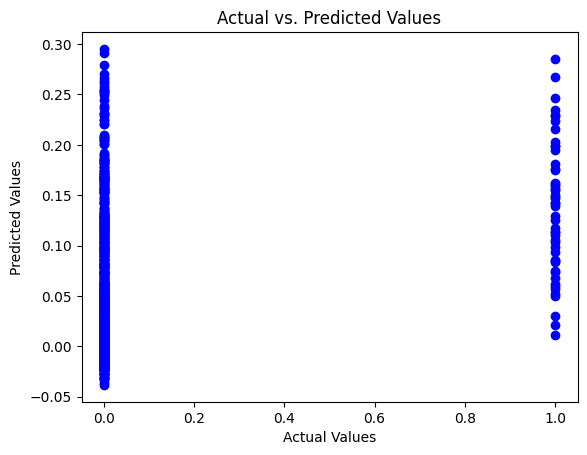

In [37]:
#Plot test against predicted values
plt.scatter(y_test, y_hat, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

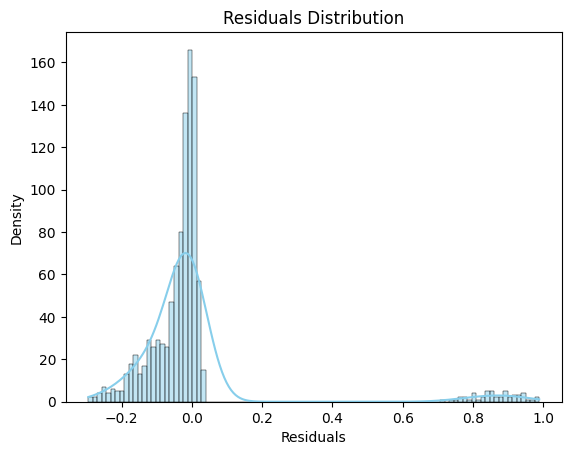

In [38]:
# Compute residuals
residuals = y_test - y_hat

sns.histplot(residuals, kde=True, color='skyblue')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

In [39]:
from sklearn.metrics import confusion_matrix, classification_report

# Predictions from your model
y_pred = cart.predict(X_test_categ_oh)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)


Confusion Matrix:
 [[973   0]
 [ 50   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       973
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1023
   macro avg       0.48      0.50      0.49      1023
weighted avg       0.90      0.95      0.93      1023



c:\Python311-32\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311-32\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311-32\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


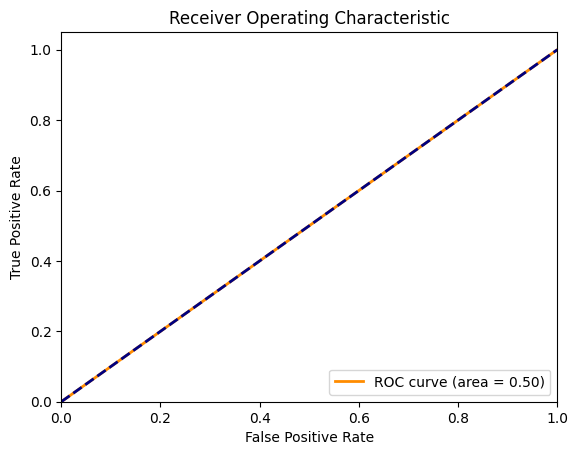

In [40]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate False Positive Rate and True Positive Rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [41]:
# Feature importance
importances = cart.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train_categ_oh.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


Feature ranking:
1. feature 0 (0.586150)
2. feature 7 (0.160419)
3. feature 12 (0.079062)
4. feature 10 (0.076184)
5. feature 14 (0.068187)
6. feature 13 (0.027279)
7. feature 3 (0.002718)
8. feature 11 (0.000000)
9. feature 9 (0.000000)
10. feature 8 (0.000000)
11. feature 6 (0.000000)
12. feature 5 (0.000000)
13. feature 4 (0.000000)
14. feature 2 (0.000000)
15. feature 1 (0.000000)


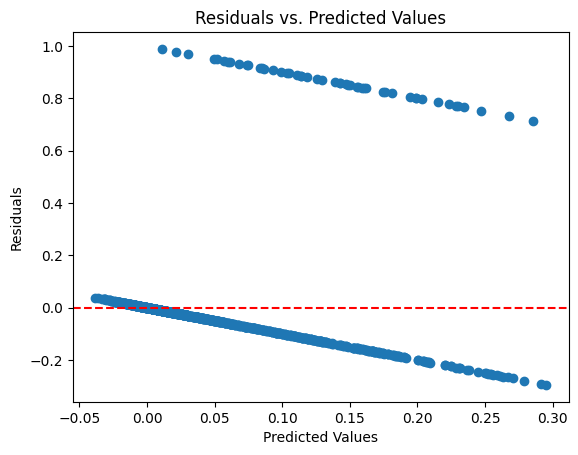

In [42]:
# Residuals from Linear Regression
residuals = y_test - y_hat

# Scatter plot of residuals
plt.scatter(y_hat, residuals)
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()


In [43]:
from sklearn.model_selection import cross_val_score

# Cross-validation scores for your decision tree model
cv_scores = cross_val_score(cart, X_train_categ_oh, y_train, cv=5)

print("Average Cross-Validation Score: ", np.mean(cv_scores))


Average Cross-Validation Score:  0.9513091308472467
